# 使用Google股票月度收益率資料分析

In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import *
from statsmodels.tsa import stattools
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model

In [2]:
indexRet = pd.read_csv('index.csv',sep='\t')
indexRet.index=pd.to_datetime(indexRet.Date)
indexRet

,CO_ID,CoName,Date,ROI
Date,,,,
2014-01-02,Y9999,TSE Taiex,2014/01/02,0.0120
2014-01-02,TWN50,TW 50 INDEX,2014/01/02,-0.3534
2014-01-02,TM100,TW MID-CAP INDEX,2014/01/02,0.6243
2014-01-03,Y9999,TSE Taiex,2014/01/03,-0.7663
2014-01-03,TWN50,TW 50 INDEX,2014/01/03,-1.1200
...,...,...,...,...
2016-12-30,Y9999,TSE Taiex,2016/12/30,1.0970
2016-12-30,TWN50,TW 50 INDEX,2016/12/30,1.0403
2016-12-30,CR100,TWSE CG100 TR Index,2016/12/30,1.1900


In [3]:
np.unique(indexRet.CoName)

array(['TSE Taiex    ', 'TW 50 INDEX  ', 'TW MID-CAP INDEX',
       'TWSE CG100 TR Index', 'Taiwan HC 100'], dtype=object)

In [4]:
taiexRet = indexRet.loc[indexRet.CoName=='TSE Taiex    '].ROI
taiexRet

Date
2014-01-02       0.0120
2014-01-03      -0.7663
2014-01-06      -0.5444
2014-01-07       0.1446
2014-01-08       0.5135
                ...    
2016-12-26       0.3514
2016-12-27      -0.0139
2016-12-28       1.0114
2016-12-29      -0.5250
2016-12-30       1.0970
Name: ROI, Length: 736, dtype: object

In [5]:
taiexRet = taiexRet.astype(np.float).dropna()

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Squared Daily Return of taiex')

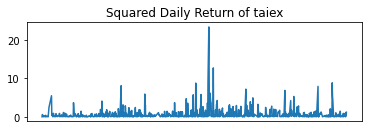

In [6]:
#繪制收益率平方序列圖
plt.subplot(211)
plt.plot(taiexRet**2)
plt.xticks([])
plt.title('Squared Daily Return of taiex')

Text(0.5, 1.0, 'Absolute Daily Return of taiex')

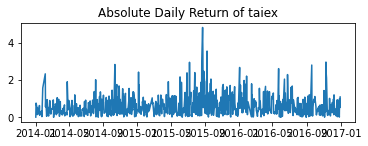

In [7]:
plt.subplot(212)
plt.plot(np.abs(taiexRet))
plt.title('Absolute Daily Return of taiex')

### LjungBox檢定

In [8]:
LjungBox=stattools.q_stat(stattools.acf(taiexRet**2)[1:13],len(taiexRet))
LjungBox[1][-1]

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


1.449575599842014e-19

### 寫出擬合的模型

In [9]:
# 設定模型
am = arch_model(taiexRet)

# 估計參數，update_freq=0是匯出最終結果
model = am.fit(update_freq=0)
print(model.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 895.0641468735382
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    ROI   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -895.064
Distribution:                  Normal   AIC:                           1798.13
Method:            Maximum Likelihood   BIC:                           1816.53
                                        No. Observations:                  736
Date:                Mon, May 17 2021   Df Residuals:                      735
Time:                        04:31:19   Df Model:                            1
                                  Mean Model                                 
  